In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt


In [192]:
df=pd.read_csv('DATA.csv', encoding='ISO-8859-1')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EquableID                         5684 non-null   int64  
 1   System_Name                       5684 non-null   object 
 2   Plan_FullName                     5684 non-null   object 
 3   Plan_InternalName                 5684 non-null   object 
 4   Plan_Shorthand                    5684 non-null   object 
 5   Investment_Fund                   5683 non-null   object 
 6   SSA                               5661 non-null   object 
 7   SSANotes                          597 non-null    object 
 8   Job_Covers                        5684 non-null   object 
 9   StateAbbrev                       5684 non-null   object 
 10  StateName                         5684 non-null   object 
 11  GovtName                          5684 non-null   object 
 12  ActRpt

In [194]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

EquableID                              0
System_Name                            0
Plan_FullName                          0
Plan_InternalName                      0
Plan_Shorthand                         0
Investment_Fund                        1
SSA                                   23
SSANotes                            5087
Job_Covers                             0
StateAbbrev                            0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                 22
Year                                   0
ValReport                            184
ACFR                                 185
DocumentNotes                       4808
MiscellaneousNotes                  5079
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL        

In [195]:
df=df.drop(columns=['SSANotes','StateAbbrev','DocumentNotes','MiscellaneousNotes','ReturnAsOf','Source','ReturnClassification','RollForward','Plan_InternalName','Plan_FullName','System_Name','EquableID' ])

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Plan_Shorthand                    5684 non-null   object 
 1   Investment_Fund                   5683 non-null   object 
 2   SSA                               5661 non-null   object 
 3   Job_Covers                        5684 non-null   object 
 4   StateName                         5684 non-null   object 
 5   GovtName                          5684 non-null   object 
 6   ActRptDate                        5684 non-null   object 
 7   DateFYE                           5684 non-null   object 
 8   Month                             5662 non-null   float64
 9   Year                              5684 non-null   int64  
 10  ValReport                         5500 non-null   float64
 11  ACFR                              5499 non-null   float64
 12  Mem_NC

In [197]:

df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        1
SSA                                   23
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                 22
Year                                   0
ValReport                            184
ACFR                                 185
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL                             831
Emp_Tot                              818
NC_Tot                               826
UAAL_Tot                             828
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

In [198]:
df['Investment_Fund'].value_counts()
# sb.countplot(df['Investment_Fund'])
df['Investment_Fund'].replace(np.nan, 'Utah Retirement System', inplace=True)
df['Investment_Fund'].isnull().sum()


0

In [199]:

# sb.countplot(df['SSA'])
df['SSA'].replace(np.nan, 'Yes', inplace=True)
df['SSA'].isnull().sum()


0

In [200]:
# df['Month'].value_counts()
# sb.displot(df['Month'])
df['Month'].replace(np.nan, df['Month'].mode()[0], inplace=True)
df['Month'].isnull().sum()

0

0

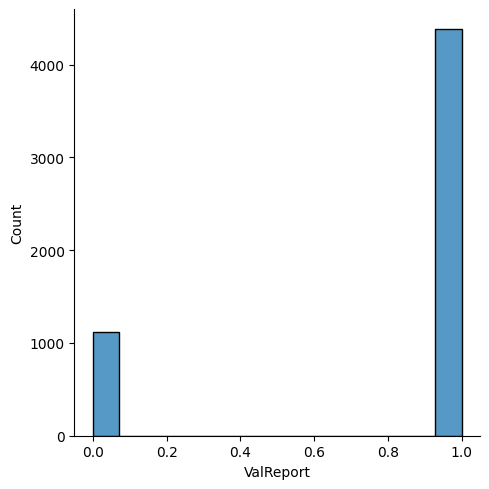

In [201]:
sns.displot(df['ValReport'])
df['ValReport'].isnull().sum()
df['ValReport'].replace(np.nan, df['ValReport'].mode()[0], inplace=True)
df['ValReport'].isnull().sum()

0

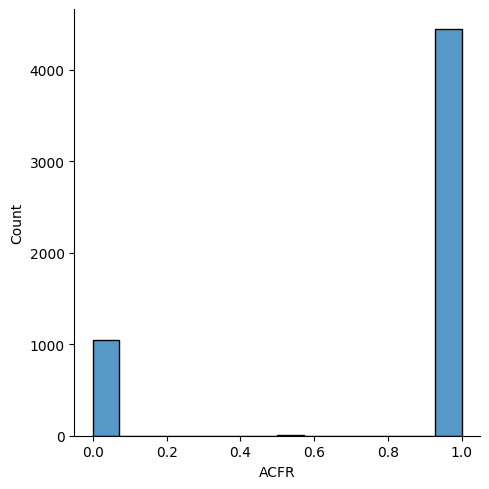

In [202]:
sns.displot(df['ACFR'])
df['ACFR'].isnull().sum()
df['ACFR'].replace(np.nan, df['ACFR'].mode()[0], inplace=True)
df['ACFR'].isnull().sum()

In [203]:
df.shape

(5684, 78)

In [204]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                               822
Mem_UAAL                             819
Mem_Tot                              819
Emp_NC                               831
Emp_UAAL                             831
Emp_Tot                              818
NC_Tot                               826
UAAL_Tot                             828
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

START OF CLEANING

Mem_NC

In [205]:
# df1=df[['Plan_Shorthand','Investment_Fund','SSA','Job_Covers','StateName','GovtName','ActRptDate','DateFYE','Month','Year','ValReport','ACFR','Mem_NC']]
df['Mem_NC'] = pd.to_numeric(df['Mem_NC'], errors='coerce')
df['Mem_NC'].isnull().sum()

1112

In [206]:
df['Mem_NC'] = df['Mem_NC'].replace(['DNE', 'N/R'], np.nan)
df['Mem_NC'].isnull().sum()

1112

In [207]:
df['Mem_NC'] = df['Mem_NC'].interpolate()
df['Mem_NC'].isnull().sum()

1

In [208]:
df['Mem_NC'] = df['Mem_NC'].fillna(0.05)
df['Mem_NC'].isnull().sum()

0

Mem_UAAL

In [209]:
df['Mem_UAAL']= pd.to_numeric(df['Mem_UAAL'], errors='coerce')

In [210]:
df['Mem_UAAL'] = df['Mem_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Mem_UAAL'].isnull().sum()

1109

In [211]:
df['Mem_UAAL'] = df['Mem_UAAL'].interpolate()
df['Mem_UAAL'] = df['Mem_UAAL'].fillna(method='bfill')
df['Mem_UAAL'].isnull().sum()


0

Mem_Tot

In [212]:
df['Mem_Tot'] = pd.to_numeric(df['Mem_Tot'], errors='coerce')

In [213]:
df['Mem_Tot'] = df['Mem_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Mem_Tot'].isnull().sum()

1109

In [214]:
df['Mem_Tot']  = df['Mem_Tot'].interpolate()
df['Mem_Tot'] = df['Mem_Tot'].fillna(method='bfill')
df['Mem_Tot'].isnull().sum()

0

In [215]:
(df['Mem_NC']==df['Mem_Tot']).value_counts()

True     5515
False     169
Name: count, dtype: int64

In [216]:
df.isnull().sum()
(df['ActRptDate']==df['DateFYE']).value_counts()

True     3449
False    2235
Name: count, dtype: int64

Emp_NC

In [217]:
df['Emp_NC'] = df['Emp_NC'].replace(['DNE', 'N/R'], np.nan)
df['Emp_NC']= pd.to_numeric(df['Emp_NC'], errors='coerce')



In [218]:
df['Emp_NC'] = df['Emp_NC'].interpolate()
df['Emp_NC'] = df['Emp_NC'].fillna(method='bfill')
df['Emp_NC'].isnull().sum()


0

Emp_UAAL

In [219]:
df['Emp_UAAL'] = df['Emp_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Emp_UAAL'] = pd.to_numeric(df['Emp_UAAL'], errors='coerce')


In [220]:
df['Emp_UAAL'] = df['Emp_UAAL'].interpolate()
df['Emp_UAAL'] = df['Emp_UAAL'].fillna(method='bfill')
df['Emp_UAAL'].isnull().sum()


0

Emp_Tot

In [221]:
df['Emp_Tot'] = df['Emp_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Emp_Tot']= pd.to_numeric(df['Emp_Tot'], errors='coerce')


In [222]:
df['Emp_Tot'] = df['Emp_Tot'].interpolate()
df['Emp_Tot'] = df['Emp_Tot'].fillna(method='bfill')
df['Emp_Tot'].isnull().sum()

0

NC_Tot

In [223]:
df['NC_Tot'] = df['NC_Tot'].replace(['DNE', 'N/R'], np.nan)
df['NC_Tot']= pd.to_numeric(df['NC_Tot'], errors='coerce')
df['NC_Tot'] = df['NC_Tot'].interpolate()
df['NC_Tot'] = df['NC_Tot'].fillna(method='bfill')
df['NC_Tot'].isnull().sum()

0

UAAL_Tot 

In [224]:
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('$','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('(','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(')','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(' ','')
# df['UAAL_Tot']

In [225]:
df['UAAL_Tot'] = df['UAAL_Tot'].replace(['DNE', 'N/R','-'], np.nan)
# df['UAAL_Tot']

In [226]:
df['UAAL_Tot']= pd.to_numeric(df['UAAL_Tot'], errors='coerce')
df['UAAL_Tot'] = df['UAAL_Tot'].interpolate()
df['UAAL_Tot'] = df['UAAL_Tot'].fillna(method='bfill')
df['UAAL_Tot'].isnull().sum()

0

InflationAssumption_GASB

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\1361878941.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['InflationAssumption_GASB'])


<Axes: xlabel='InflationAssumption_GASB', ylabel='Density'>

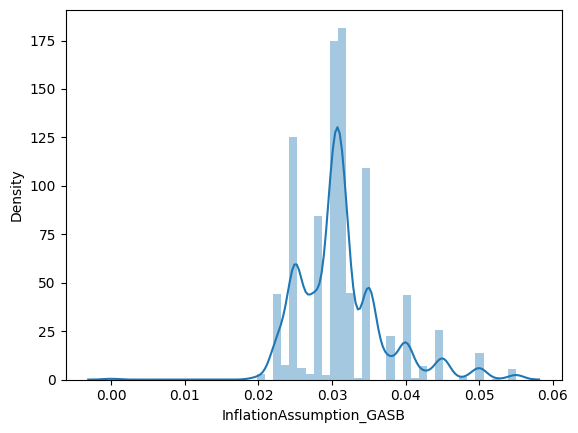

In [227]:
df['InflationAssumption_GASB']=df['InflationAssumption_GASB'].replace(['DNE','N/R'],np.nan)
df['InflationAssumption_GASB']= pd.to_numeric(df['InflationAssumption_GASB'], errors='coerce')
df['InflationAssumption_GASB'] = df['InflationAssumption_GASB'].replace(np.nan,df['InflationAssumption_GASB'].mean())
sns.distplot(df['InflationAssumption_GASB'])

In [228]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                                 0
Mem_UAAL                               0
Mem_Tot                                0
Emp_NC                                 0
Emp_UAAL                               0
Emp_Tot                                0
NC_Tot                                 0
UAAL_Tot                               0
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

In [229]:
df['GDP'].value_counts()
df['GDP']=df['GDP'].str.replace('$','')
df['GDP']=df['GDP'].str.replace(',','')
df['GDP']=df['GDP'].str.replace(' ','')

In [230]:
df['SSA'] = df['SSA'].replace(['Yes'], 1)
df['SSA'] = df['SSA'].replace(['No'], 0)
df['SSA'] = df['SSA'].replace(['Mixed'], 2)
df['SSA'].value_counts()


SSA
1    3194
0    1722
2     768
Name: count, dtype: int64

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\594340836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDP'])


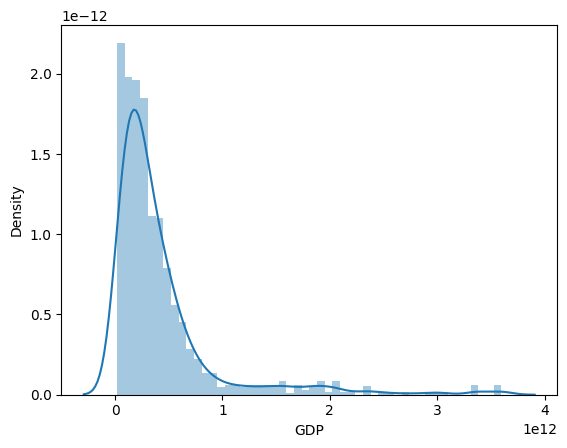

In [231]:
df['GDP']=df['GDP'].replace(["DNE","N/R"],np.nan)
df['GDP']= pd.to_numeric(df['GDP'], errors='coerce')
sns.distplot(df['GDP'])
df['GDP'].replace(np.nan,df['GDP'].median(),inplace=True)

AVL

In [232]:
df.isnull().sum()

Plan_Shorthand                         0
Investment_Fund                        0
SSA                                    0
Job_Covers                             0
StateName                              0
GovtName                               0
ActRptDate                             0
DateFYE                                0
Month                                  0
Year                                   0
ValReport                              0
ACFR                                   0
Mem_NC                                 0
Mem_UAAL                               0
Mem_Tot                                0
Emp_NC                                 0
Emp_UAAL                               0
Emp_Tot                                0
NC_Tot                                 0
UAAL_Tot                               0
AVA                                  534
AAL                                  536
UAAL                                 534
FundedRatio_Actuarial                529
MVA             

AVA

In [233]:
df['AVA'] = df['AVA'].replace(["DNE","N/R"],np.nan)
df['AVA']=df['AVA'].str.replace('$','')
df['AVA']=df['AVA'].str.replace(',','')
df['AVA']=df['AVA'].str.replace(',','')
df['AVA']=df['AVA'].str.replace(' ','')

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\1111625668.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AVA'])


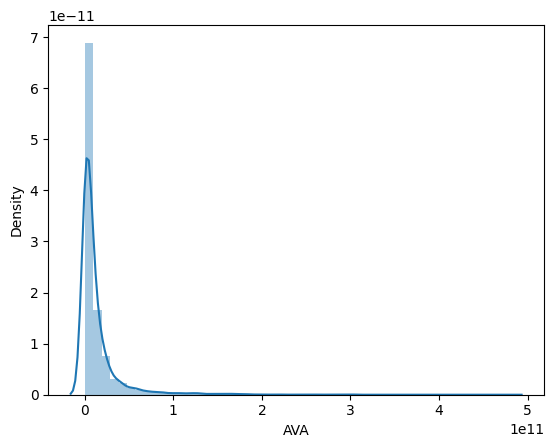

In [234]:
df['AVA']= pd.to_numeric(df['AVA'], errors='coerce')
sns.distplot(df['AVA'])
df['AVA'].replace(np.nan,df['AVA'].median(),inplace=True)

 AAL 

In [235]:
df['AAL'] = df['AAL'].replace(["DNE","N/R"],np.nan)
# df['AAL'].isnull().sum()
df['AAL']= pd.to_numeric(df['AAL'], errors='coerce')
# sns.distplot(df['AAL'])
df['AAL'].replace(np.nan,df['AAL'].median(),inplace=True)


 UAAL 
 

In [236]:
df['UAAL'] = df['UAAL'].replace(["DNE","N/R"],np.nan)
df['UAAL']=df['UAAL'].str.replace('$','')
df['UAAL']=df['UAAL'].str.replace(',','')
df['UAAL']=df['UAAL'].str.replace(',','')
df['UAAL']=df['UAAL'].str.replace(' ','')
df['UAAL']=df['UAAL'].str.replace(')','')
df['UAAL']=df['UAAL'].str.replace('(','')

In [237]:
df['UAAL']= pd.to_numeric(df['UAAL'], errors='coerce')
# sns.displot(df['UAAL'])
df['UAAL'].replace(np.nan,df['UAAL'].median(),inplace=True)
df['UAAL'].isnull().sum()

0

FundedRatio_Actuarial

In [238]:
df['FundedRatio_Actuarial'] = df['FundedRatio_Actuarial'].replace(["DNE","N/R"],np.nan)
df['FundedRatio_Actuarial']
df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace('$','')
# df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace(',','')
# df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace(',','')
df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace(' ','')
# df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace(')','')
# df['FundedRatio_Actuarial']=df['FundedRatio_Actuarial'].str.replace('(','')

In [239]:
df['FundedRatio_Actuarial']= pd.to_numeric(df['FundedRatio_Actuarial'], errors='coerce')
# sns.displot(df['FundedRatio_Actuarial'])
df['FundedRatio_Actuarial'].replace(np.nan,df['FundedRatio_Actuarial'].mean(),inplace=True)

MVA

In [240]:
df['MVA'] = df['MVA'].replace(["DNE","N/R"],np.nan)
df['MVA']=df['MVA'].str.replace('$','')
df['MVA']=df['MVA'].str.replace(',','')
df['MVA']=df['MVA'].str.replace(',','')
df['MVA']=df['MVA'].str.replace(' ','')
df['MVA']=df['MVA'].str.replace(')','')
df['MVA']=df['MVA'].str.replace('(','')

In [241]:
# df['MVA']
df['MVA']= pd.to_numeric(df['MVA'], errors='coerce')
# sns.displot(df['MVA'])
df['MVA'].replace(np.nan,df['MVA'].median(),inplace=True)
df['MVA'].isnull().sum()

0

CoveredPayroll_SFP 

In [242]:
df['CoveredPayroll_SFP']=df['CoveredPayroll_SFP'].str.replace('$','')
df['CoveredPayroll_SFP']=df['CoveredPayroll_SFP'].str.replace(',','')


In [243]:
df['CoveredPayroll_SFP']=df['CoveredPayroll_SFP'].replace(["DNE","N/R"],np.nan)

In [244]:
df['CoveredPayroll_SFP'] = pd.to_numeric(df['CoveredPayroll_SFP'], errors='coerce')
# df['CoveredPayroll_SFP'].value_counts()

In [245]:
df['CoveredPayroll_SFP']=df['CoveredPayroll_SFP'].replace(["DNE","N/R"],np.nan)
df['CoveredPayroll_SFP'].isnull().sum()

705

In [246]:
# sns.displot(df['CoveredPayroll_SFP'])
df['CoveredPayroll_SFP'] = df['CoveredPayroll_SFP'].interpolate()
df['CoveredPayroll_SFP'].isnull().sum()

0

 CoveredPayroll_SEC 

In [247]:
df['CoveredPayroll_SEC']=df['CoveredPayroll_SEC'].str.replace('$','')
df['CoveredPayroll_SEC']=df['CoveredPayroll_SEC'].str.replace(',','')

In [248]:
df['CoveredPayroll_SEC']=df['CoveredPayroll_SEC'].replace(["DNE","N/R"],np.nan)

In [249]:
df['CoveredPayroll_SEC'] = pd.to_numeric(df['CoveredPayroll_SEC'], errors='coerce')
# df['CoveredPayroll_SEC'].value_counts()

In [250]:
df['CoveredPayroll_SEC'].replace(np.nan,df['CoveredPayroll_SEC'].median(),inplace=True)
df['CoveredPayroll_SEC'].isnull().sum()

0

 ActiveMemberSalaries 


In [251]:
df['ActiveMemberSalaries']=df['ActiveMemberSalaries'].replace(["DNE","N/R"],np.nan)
df['ActiveMemberSalaries'].isnull().sum()
df['ActiveMemberSalaries'] = pd.to_numeric(df['CoveredPayroll_SEC'], errors='coerce')

In [252]:
# sns.distplot(df['ActiveMemberSalaries'])

In [253]:
df['ActiveMemberSalaries'].replace(np.nan,df['ActiveMemberSalaries'].median(),inplace=True)
df['ActiveMemberSalaries'].isnull().sum()

0

 TPL 

In [254]:
df['TPL'] = df['TPL'].str.replace('$','')
df['TPL'] = df['TPL'].str.replace(',','')
df['TPL'] = df['TPL'].str.replace(' ','')
df['TPL'].isnull().sum()

1264

In [255]:
df['TPL']=df['TPL'].replace(["DNE","N/R"],np.nan)
# df['TPL']

In [256]:
df['TPL'] = pd.to_numeric(df['TPL'], errors='coerce')
df['TPL'].isnull().sum()
# df['TPL'].value_counts()

3506

In [257]:
df['TPL'].replace(np.nan,df['TPL'].median(),inplace=True)
df['TPL'].isnull().sum()

0

 FNP 

In [258]:
df['FNP']=df['FNP'].str.replace('$','')
df['FNP']=df['FNP'].str.replace(',','') 
df['FNP']=df['FNP'].str.replace(' ','') 
# df['FNP']

In [259]:
df['FNP']=df['FNP'].replace(["DNE","N/R"],np.nan)
# df['FNP'].isnull().sum()

In [260]:
df['FNP'] = pd.to_numeric(df['FNP'], errors='coerce')
df['FNP'].isnull().sum()
# df['FNP'].value_counts()

3477

In [261]:
df['FNP'].replace(np.nan,df['FNP'].median(),inplace=True)
df['FNP'].isnull().sum()

0

 NPL 
 

In [262]:
df['NPL'] = df['NPL'].str.replace('$','')
df['NPL'] = df['NPL'].str.replace(',','')
df['NPL'] = df['NPL'].str.replace(' ','')
# df['NPL']

In [263]:
df['NPL'] = df['NPL'].replace(["DNE","N/R"],np.nan)
df['NPL'] = pd.to_numeric(df['NPL'],errors='coerce')
# sns.distplot(df['NPL']) 
# df['NPL'].value_counts()

In [264]:
df['NPL'].replace(np.nan,df['NPL'].median(),inplace=True)
df['NPL'].isnull().sum()

0

ARR

In [265]:
df['ARR'] = df['ARR'].str.replace(' ','')
# df['ARR']

In [266]:
df['ARR'] = df['ARR'].replace(["DNE","N/R"],np.nan)
df['ARR'] = pd.to_numeric(df['ARR'],errors='coerce')
# sns.distplot(df['ARR']) 
# df['ARR'].isnull().sum()

In [267]:
df['ARR'].replace(np.nan,df['ARR'].mean(),inplace=True)
df['ARR'].isnull().sum()

0

In [268]:
# sns.distplot(df['ARR']) 


Returns_1Year

In [269]:
df['Returns_1Year'] = df['Returns_1Year'].str.replace(' ','')
# df['Returns_1Year']

In [270]:
df['Returns_1Year'] = df['Returns_1Year'].replace(["DNE","N/R"],np.nan)
df['Returns_1Year'] = pd.to_numeric(df['Returns_1Year'],errors='coerce')
# sns.distplot(df['Returns_1Year']) 
df['Returns_1Year'].isnull().sum()

599

In [271]:
df['Returns_1Year'].replace(np.nan,df['Returns_1Year'].mean(),inplace=True)
df['Returns_1Year'].isnull().sum()

0

Returns_3Year

In [272]:
df['Returns_3Year'] = df['Returns_3Year'].str.replace(' ','')
# df['Returns_1Year']

In [273]:
df['Returns_3Year'] = df['Returns_3Year'].replace(["DNE","N/R"],np.nan)
df['Returns_3Year'] = pd.to_numeric(df['Returns_3Year'],errors='coerce')
# sns.distplot(df['Returns_3Year']) 
df['Returns_3Year'].isnull().sum()

1861

In [274]:
df['Returns_3Year'].replace(np.nan,df['Returns_3Year'].median(),inplace=True)
df['Returns_3Year'].isnull().sum()

0

Returns_5Year

In [275]:
df['Returns_5Year'] = df['Returns_5Year'].str.replace(' ','')
# df['Returns_5Year']

In [276]:
df['Returns_5Year'] = df['Returns_5Year'].replace(["DNE","N/R"],np.nan)
df['Returns_5Year'] = pd.to_numeric(df['Returns_5Year'],errors='coerce')
# sns.distplot(df['Returns_5Year']) 
df['Returns_5Year'].isnull().sum()

1691

In [277]:
df['Returns_5Year'].replace(np.nan,df['Returns_5Year'].median(),inplace=True)
df['Returns_5Year'].isnull().sum()

0

Returns_10Year

In [278]:
df['Returns_10Year'] = df['Returns_10Year'].str.replace(' ','')
# df['Returns_1Year']

In [279]:
df['Returns_10Year'] = df['Returns_10Year'].replace(["DNE","N/R"],np.nan)
df['Returns_10Year'] = pd.to_numeric(df['Returns_10Year'],errors='coerce')
# sns.distplot(df['Returns_10Year']) 
df['Returns_10Year'].isnull().sum()

2907

In [280]:
df['Returns_10Year'].replace(np.nan,df['Returns_10Year'].mean(),inplace=True)
df['Returns_10Year'].isnull().sum()
# sns.distplot(df['Returns_10Year']) 

0

EquityAllocationActual

In [281]:
# df['EquityAllocationActual']
df['EquityAllocationActual'] = df['EquityAllocationActual'].str.replace(' ','')
# df['EquityAllocationActual']

In [282]:
df['EquityAllocationActual'] = df['EquityAllocationActual'].replace(["DNE","N/R"],np.nan)
df['EquityAllocationActual'] = pd.to_numeric(df['EquityAllocationActual'],errors='coerce')
# sns.distplot(df['EquityAllocationActual']) 
# df['EquityAllocationActual'].isnull().sum()

In [283]:
df['EquityAllocationActual'].replace(np.nan,df['EquityAllocationActual'].mean(),inplace=True)
df['EquityAllocationActual'].isnull().sum()
# sns.distplot(df['Returns_10Year']) 

0

FixedIncomeAllocationActual

In [284]:
df['FixedIncomeAllocationActual'] = df['FixedIncomeAllocationActual'].str.replace(' ','')

In [285]:

df['FixedIncomeAllocationActual'] = df['FixedIncomeAllocationActual'].replace(["DNE","N/R"],np.nan)
df['FixedIncomeAllocationActual'] = pd.to_numeric(df['FixedIncomeAllocationActual'],errors='coerce')
# sns.distplot(df['FixedIncomeAllocationActual']) 
# df['EquityAllocationActual'].isnull().sum()

In [286]:
df['FixedIncomeAllocationActual'].replace(np.nan,df['FixedIncomeAllocationActual'].mean(),inplace=True)
df['FixedIncomeAllocationActual'].isnull().sum()
# sns.distplot(df['FixedIncomeAllocationActual']) 

0

RealEstateAllocationActual

In [287]:
df['RealEstateAllocationActual']
df['RealEstateAllocationActual'] = df['RealEstateAllocationActual'].str.replace(' ','')

In [288]:
df['RealEstateAllocationActual'] = df['RealEstateAllocationActual'].replace(["DNE","N/R"],np.nan)
df['RealEstateAllocationActual'] = pd.to_numeric(df['RealEstateAllocationActual'],errors='coerce')
# sns.distplot(df['RealEstateAllocationActual']) 
# df['RealEstateAllocationActual'].isnull().sum()

In [289]:
df['RealEstateAllocationActual'].replace(np.nan,df['RealEstateAllocationActual'].median(),inplace=True)
df['RealEstateAllocationActual'].isnull().sum()
# sns.distplot(df['FixedIncomeAllocationActual']) 

0

AltMiscAllocationActual

In [290]:
df['AltMiscAllocationActual']
df['AltMiscAllocationActual'] = df['AltMiscAllocationActual'].str.replace(' ','')

In [291]:
df['AltMiscAllocationActual'] = df['AltMiscAllocationActual'].replace(["DNE","N/R"],np.nan)
df['AltMiscAllocationActual'] = pd.to_numeric(df['AltMiscAllocationActual'],errors='coerce')
# sns.distplot(df['RealEstateAllocationActual']) 
df['AltMiscAllocationActual'].isnull().sum()

981

In [292]:
df['AltMiscAllocationActual'].replace(np.nan,df['AltMiscAllocationActual'].mean(),inplace=True)
df['AltMiscAllocationActual'].isnull().sum()
# sns.distplot(df['FixedIncomeAllocationActual']) 

0

PrivateEquityAllocationActual

In [293]:
df['PrivateEquityAllocationActual']
df['PrivateEquityAllocationActual'] = df['PrivateEquityAllocationActual'].str.replace(' ','')

In [294]:

df['PrivateEquityAllocationActual'] = df['PrivateEquityAllocationActual'].replace(["DNE","N/R"],np.nan)
df['PrivateEquityAllocationActual'] = pd.to_numeric(df['PrivateEquityAllocationActual'],errors='coerce')
# sns.distplot(df['PrivateEquityAllocationActual']) 
df['PrivateEquityAllocationActual'].isnull().sum()

980

In [295]:
df['PrivateEquityAllocationActual'].replace(np.nan,df['PrivateEquityAllocationActual'].median(),inplace=True)
df['PrivateEquityAllocationActual'].isnull().sum()
# sns.distplot(df['PrivateEquityAllocationActual']) 

0

HedgeFundAllocationActual

In [296]:
df['HedgeFundAllocationActual'] = df['HedgeFundAllocationActual'].str.replace(' ','')

In [297]:
df['HedgeFundAllocationActual'] = df['HedgeFundAllocationActual'].replace(["DNE","N/R"],np.nan)
df['HedgeFundAllocationActual'] = pd.to_numeric(df['HedgeFundAllocationActual'],errors='coerce')
# sns.distplot(df['HedgeFundAllocationActual']) 
df['HedgeFundAllocationActual'].isnull().sum()

980

In [298]:
df['HedgeFundAllocationActual'].replace(np.nan,df['HedgeFundAllocationActual'].median(),inplace=True)
df['HedgeFundAllocationActual'].isnull().sum()
# sns.distplot(df['HedgeFundAllocationActual']) 

0

COMDAllocationActual

In [299]:
# df['COMDAllocationActual']
df['COMDAllocationActual'] = df['COMDAllocationActual'].str.replace(' ','')

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\1613921604.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HedgeFundAllocationActual'])


<Axes: xlabel='HedgeFundAllocationActual', ylabel='Density'>

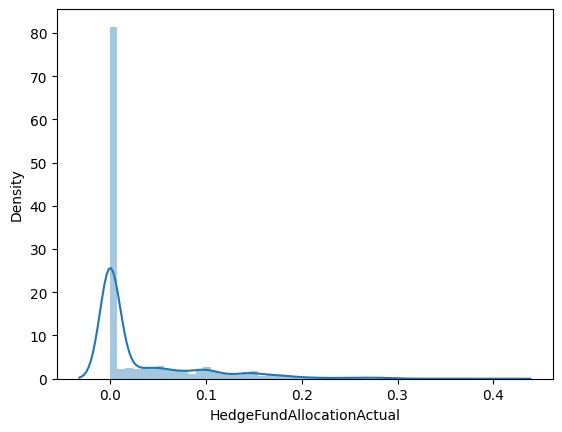

In [300]:
df['COMDAllocationActual'] = df['COMDAllocationActual'].replace(["DNE","N/R"],np.nan)
df['COMDAllocationActual'] = pd.to_numeric(df['COMDAllocationActual'],errors='coerce')
sns.distplot(df['HedgeFundAllocationActual']) 
# df['COMDAllocationActual'].isnull().sum()

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\1691907710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['COMDAllocationActual'])


<Axes: xlabel='COMDAllocationActual', ylabel='Density'>

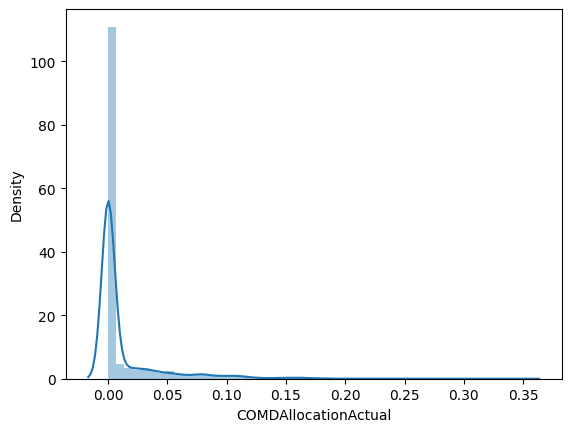

In [301]:
df['COMDAllocationActual'].replace(np.nan,df['COMDAllocationActual'].median(),inplace=True)
df['COMDAllocationActual'].isnull().sum()
sns.distplot(df['COMDAllocationActual']) 

CashAllocationActual

In [302]:
df['CashAllocationActual']
df['CashAllocationActual'] = df['CashAllocationActual'].str.replace(' ','')

In [303]:
df['CashAllocationActual'] = df['CashAllocationActual'].replace(["DNE","N/R"],np.nan)
df['CashAllocationActual'] = pd.to_numeric(df['CashAllocationActual'],errors='coerce')
# sns.distplot(df['CashAllocationActual']) 
# df['COMDAllocationActual'].isnull().sum()

In [304]:
df['CashAllocationActual'].replace(np.nan,df['CashAllocationActual'].median(),inplace=True)
df['CashAllocationActual'].isnull().sum()
# sns.distplot(df['CashAllocationActual']) 

0

OtherAllocationActual

In [305]:
df['OtherAllocationActual'].value_counts()
df['OtherAllocationActual'] = df['OtherAllocationActual'].str.replace('$','')
df['OtherAllocationActual'] = df['OtherAllocationActual'].str.replace('(','')
df['OtherAllocationActual'] = df['OtherAllocationActual'].str.replace(')','')
df['OtherAllocationActual'] = df['OtherAllocationActual'].str.replace(' ','')
# df['OtherAllocationActual'].value_counts()

In [306]:
df['OtherAllocationActual'] = df['OtherAllocationActual'].replace(["DNE","N/R"],np.nan)
df['OtherAllocationActual'] = pd.to_numeric(df['OtherAllocationActual'],errors='coerce')
# sns.distplot(df['OtherAllocationActual']) 
# df['COMDAllocationActual'].isnull().sum()

In [307]:
df['OtherAllocationActual'].replace(np.nan,df['OtherAllocationActual'].median(),inplace=True)
df['OtherAllocationActual'].isnull().sum()
# sns.distplot(df['OtherAllocationActual']) 

0

AssetAllocationTotal

In [308]:
df['AssetAllocationTotal'] = df['AssetAllocationTotal'].str.replace(' ','')
# df['OtherAllocationActual'].value_counts()

In [309]:
df['AssetAllocationTotal'] = df['AssetAllocationTotal'].replace(["DNE","N/R"],np.nan)
df['AssetAllocationTotal'] = pd.to_numeric(df['AssetAllocationTotal'],errors='coerce')
# sns.distplot(df['OtherAllocationActual']) 
# df['COMDAllocationActual'].isnull().sum()

In [310]:
df['AssetAllocationTotal'].replace(np.nan,df['AssetAllocationTotal'].median(),inplace=True)
# df['AssetAllocationTotal'].isnull().sum()
# sns.distplot(df['OtherAllocationActual']) 

DiscountRate

In [311]:
df['DiscountRate']
df['DiscountRate'] = df['DiscountRate'].str.replace(' ','')
# df['DiscountRate'].value_counts()

In [312]:
df['DiscountRate'] = df['DiscountRate'].replace(["DNE","N/R"],np.nan)
df['DiscountRate'] = pd.to_numeric(df['DiscountRate'],errors='coerce')
# sns.distplot(df['DiscountRate']) 
# df['DiscountRate'].isnull().sum()

In [313]:
df['DiscountRate'].replace(np.nan,df['DiscountRate'].mean(),inplace=True)
# df['DiscountRate'].isnull().sum()
# sns.distplot(df['DiscountRate']) 

AmortPeriodR

In [314]:
df['AmortPeriodR']
df['AmortPeriodR'] = df['AmortPeriodR'].str.replace(' ','')
df['AmortPeriodR'] = df['AmortPeriodR'].str.replace('-','')
df['AmortPeriodR'] = df['AmortPeriodR'].str.replace('$','')
df['AmortPeriodR'].value_counts()

AmortPeriodR
30.00       984
20.00       449
            305
25.00       241
Infinite    153
29.00       147
28.00       143
24.00       135
15.00       124
26.00       117
27.00       115
23.00       112
22.00       107
21.00       101
DNE          95
40.00        94
18.00        80
19.00        78
17.00        67
16.00        61
N/R          57
10.00        56
12.00        40
N/A          30
14.00        29
32.00        28
13.00        24
31.00        22
9.00         19
Missing      17
33.00        17
11.00        16
35.00        13
36.00        13
Varies       12
34.00        12
7.00         11
100.00       11
38.00        11
5.00         11
8.00          9
37.00         9
41.00         6
39.00         6
6.00          6
2.00          5
29.30         5
43.00         5
42.00         5
21.90         5
17.75         4
4.00          4
44.00         4
23.50         4
45.00         3
13.50         3
20.50         3
17.50         3
46.00         3
23.40         3
22.60         3
26.50      

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\2330014011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AmortPeriodR'])


<Axes: xlabel='AmortPeriodR', ylabel='Density'>

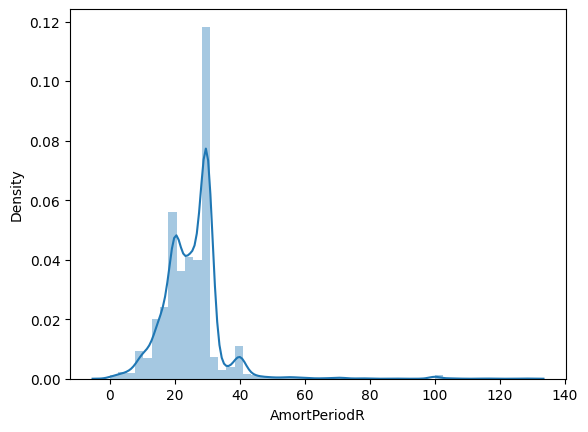

In [315]:
df['AmortPeriodR'] = df['AmortPeriodR'].replace(["DNE","N/R"],np.nan)
df['AmortPeriodR'] = pd.to_numeric(df['AmortPeriodR'],errors='coerce')
sns.distplot(df['AmortPeriodR']) 
# df['AmortPeriodR'].isnull().sum()

C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\595991564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AmortPeriodR'])


<Axes: xlabel='AmortPeriodR', ylabel='Density'>

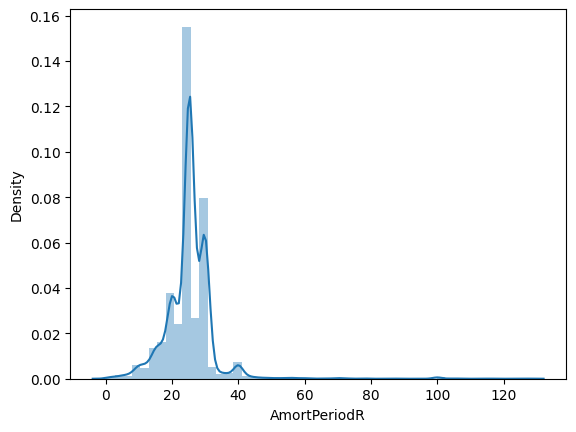

In [316]:
df['AmortPeriodR'].replace(np.nan,df['AmortPeriodR'].mean(),inplace=True)
df['AmortPeriodR'].isnull().sum()
sns.distplot(df['AmortPeriodR']) 

In [317]:
#ADEC

In [318]:
df['ADEC']=df['ADEC'].str.replace('$','')
df['ADEC']=df['ADEC'].str.replace(',','')
df['ADEC']=df['ADEC'].str.replace(' ','')

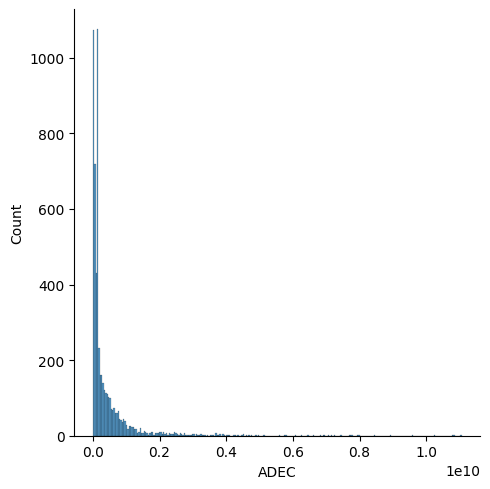

In [319]:
df['ADEC']=df['ADEC'].replace(["DNE","N/R","-"],np.nan)
df['ADEC']= pd.to_numeric(df['ADEC'], errors='coerce')
df['ADEC'].replace(np.nan,df['ADEC'].median(),inplace=True)
# df['ADEC'].value_counts()
sns.displot(df['ADEC'])

In [320]:
#ADECasPercentofCoveredPayroll

0

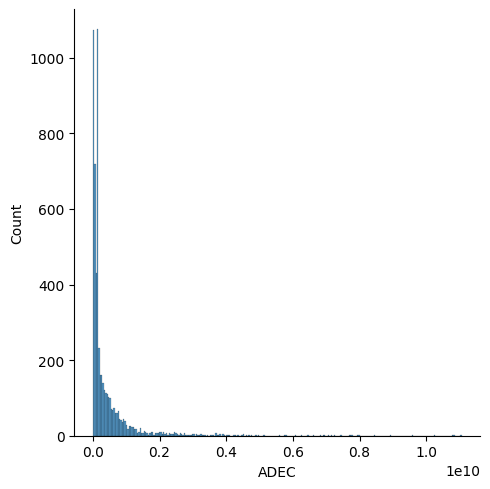

In [321]:
df['ADECasPercentofCoveredPayroll']=df['ADECasPercentofCoveredPayroll'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['ADECasPercentofCoveredPayroll'].replace(np.nan,df['ADECasPercentofCoveredPayroll'].median(),inplace=True)
sns.displot(df['ADEC'])
df['ADECasPercentofCoveredPayroll'].isnull().sum()

In [322]:
#PaidContributionasPercentofCover

In [323]:
df['PaidContributionasPercentofCover']= pd.to_numeric(df['PaidContributionasPercentofCover'], errors='coerce')
df['PaidContributionasPercentofCover']=df['PaidContributionasPercentofCover'].interpolate()
df['PaidContributionasPercentofCover'].isnull().sum()
# sns.displot(df['PaidContributionasPercentofCover'])
# df['ADECasPercentofCoveredPayroll'].value_counts()

0

In [324]:
#RequiredEmployerContribution

In [325]:
df['RequiredEmployerContribution']=df['RequiredEmployerContribution'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['RequiredEmployerContribution']= pd.to_numeric(df['RequiredEmployerContribution'], errors='coerce')
df['RequiredEmployerContribution']=df['RequiredEmployerContribution'].interpolate()
df['RequiredEmployerContribution'].isnull().sum()
# sns.distplot(df['RequiredEmployerContribution'])
# df['RequiredEmployerContribution'].value_counts()

0

In [326]:
#PaidEmployerContribution

In [327]:
df['PaidEmployerContribution']=df['PaidEmployerContribution'].str.replace('$','')
df['PaidEmployerContribution']=df['PaidEmployerContribution'].str.replace(',','')
df['PaidEmployerContribution']=df['PaidEmployerContribution'].str.replace(' ','')

In [328]:
df['PaidEmployerContribution']=df['PaidEmployerContribution'].replace(["DNE","N/R","-"],np.nan)
df['PaidEmployerContribution']= pd.to_numeric(df['PaidEmployerContribution'], errors='coerce')
df['PaidEmployerContribution'].replace(np.nan,df['PaidEmployerContribution'].median(),inplace=True)
# df['ADEC'].value_counts()
# sns.distplot(df['PaidEmployerContribution'])
# df['PaidEmployerContribution'].value_counts()

In [329]:
#PercentReqContPaidContPaidAsPer

In [330]:
df['PercentReqContPaidContPaidAsPer']=df['PercentReqContPaidContPaidAsPer'].str.replace('$','')
df['PercentReqContPaidContPaidAsPer']=df['PercentReqContPaidContPaidAsPer'].str.replace(',','')
df['PercentReqContPaidContPaidAsPer']=df['PercentReqContPaidContPaidAsPer'].str.replace(' ','')
# df['PercentReqContPaidContPaidAsPer'].value_counts()

In [331]:
df['PercentReqContPaidContPaidAsPer']=df['PercentReqContPaidContPaidAsPer'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['PercentReqContPaidContPaidAsPer']= pd.to_numeric(df['PercentReqContPaidContPaidAsPer'], errors='coerce')
df['PercentReqContPaidContPaidAsPer']=df['PercentReqContPaidContPaidAsPer'].interpolate()
df['PercentReqContPaidContPaidAsPer'] = df['PercentReqContPaidContPaidAsPer'].fillna(method='bfill')

df['PercentReqContPaidContPaidAsPer'].value_counts()
df['PercentReqContPaidContPaidAsPer'].isnull().sum()

0

In [332]:
#PayrollGrowthAssumption

In [333]:
df['PayrollGrowthAssumption']=df['PayrollGrowthAssumption'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['PayrollGrowthAssumption'].replace(np.nan,df['PaidEmployerContribution'].median(),inplace=True)
df['PayrollGrowthAssumption'].isnull().sum()
# df['PayrollGrowthAssumption'].value_counts().sort_index()
# sns.distplot(df['PayrollGrowthAssumption'])

0

In [334]:
# RetirementBenefits

In [335]:
df['RetirementBenefits']=df['RetirementBenefits'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['RetirementBenefits']= pd.to_numeric(df['RetirementBenefits'], errors='coerce')

df['RetirementBenefits']=df['RetirementBenefits'].interpolate()
df['RetirementBenefits'].isnull().sum()
# df['RetirementBenefits'].value_counts().sort_index()

0

In [336]:
#ActiveMemberTotal

In [337]:
df['ActiveMemberTotal']=df['ActiveMemberTotal'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['ActiveMemberTotal']= pd.to_numeric(df['ActiveMemberTotal'], errors='coerce')

df['ActiveMemberTotal']=df['ActiveMemberTotal'].interpolate()
df['ActiveMemberTotal'] = df['ActiveMemberTotal'].fillna(method='bfill')

df['ActiveMemberTotal'].isnull().sum()

0

In [338]:
#InactiveVestedMembers

In [339]:
df['InactiveVestedMembers']=df['InactiveVestedMembers'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['InactiveVestedMembers']= pd.to_numeric(df['InactiveVestedMembers'], errors='coerce')

df['InactiveVestedMembers']=df['InactiveVestedMembers'].interpolate()
df['InactiveVestedMembers'] = df['InactiveVestedMembers'].fillna(method='bfill')
df['InactiveVestedMembers'].isnull().sum()#.value_counts()

0

In [340]:
# df['InactiveNonVested'].value_counts()
df['InactiveNonVested']=df['InactiveNonVested'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['InactiveNonVested']= pd.to_numeric(df['InactiveNonVested'], errors='coerce')

df['InactiveNonVested']=df['InactiveNonVested'].interpolate()
df['InactiveNonVested'] = df['InactiveNonVested'].fillna(method='bfill')
df['InactiveNonVested'].isnull().sum()#.value_counts()

0

0

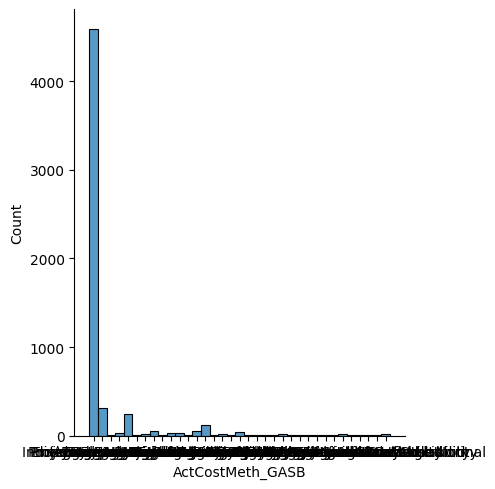

In [341]:
df['ActCostMeth_GASB']=df['ActCostMeth_GASB'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['ActCostMeth_GASB'].replace(np.nan,df['ActCostMeth_GASB'].mode()[0],inplace=True)


df['ActCostMeth_GASB'].value_counts()
sns.displot(df['ActCostMeth_GASB'])
df['ActCostMeth_GASB'].isnull().sum()

In [342]:
#AssetValMeth_GASB

c:\Users\sgote\.conda\envs\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


0

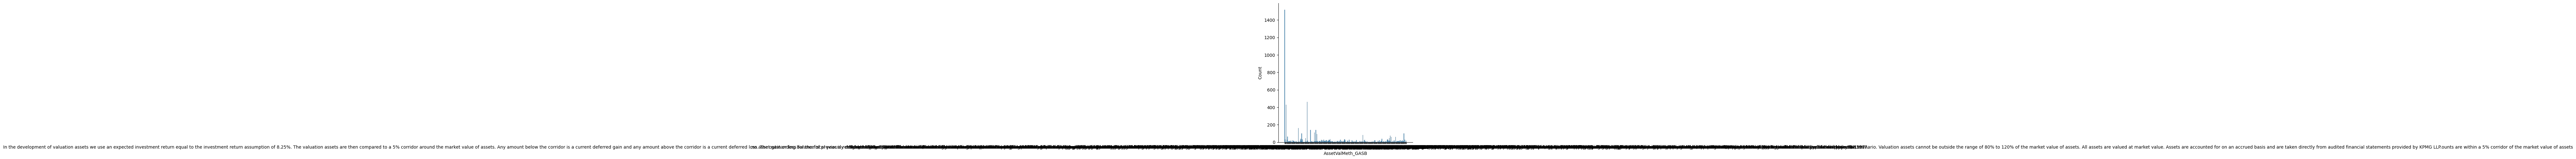

In [343]:
df['AssetValMeth_GASB']=df['AssetValMeth_GASB'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['AssetValMeth_GASB'].replace(np.nan,df['AssetValMeth_GASB'].mode()[0],inplace=True)


df['AssetValMeth_GASB'].value_counts()
sns.displot(df['AssetValMeth_GASB'])
df['AssetValMeth_GASB'].isnull().sum()

In [344]:
#FundingMeth_GASB 

0

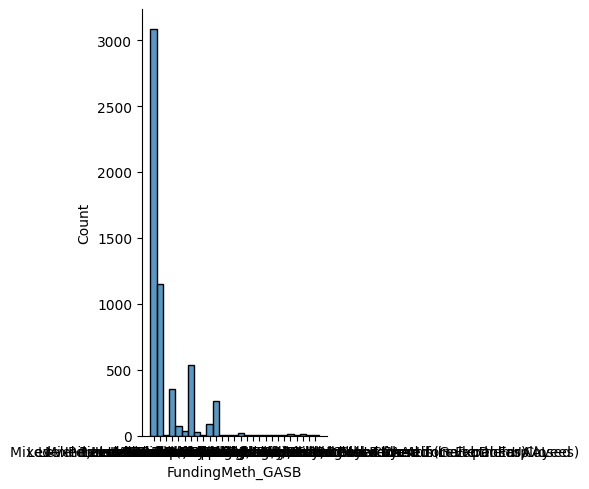

In [345]:
df['FundingMeth_GASB']=df['FundingMeth_GASB'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['FundingMeth_GASB'].replace(np.nan,df['FundingMeth_GASB'].mode()[0],inplace=True)


df['FundingMeth_GASB'].value_counts()
sns.displot(df['FundingMeth_GASB'])
df['FundingMeth_GASB'].isnull().sum()

0

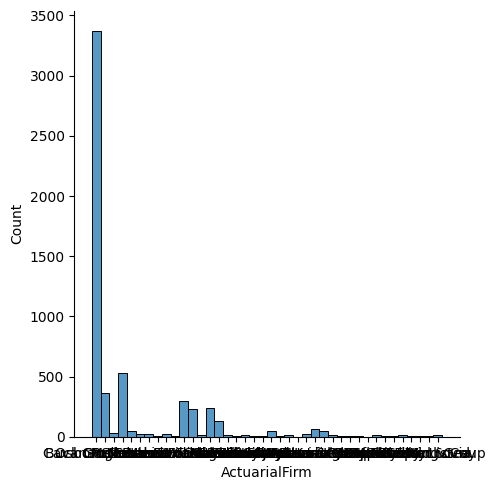

In [346]:
df['ActuarialFirm']=df['ActuarialFirm'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['ActuarialFirm'].replace(np.nan,df['ActuarialFirm'].mode()[0],inplace=True)


df['ActuarialFirm'].value_counts()
sns.displot(df['ActuarialFirm'])
df['ActuarialFirm'].isnull().sum()

In [347]:
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].str.replace('$','')
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].str.replace(',','')
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].str.replace(' ','')
df['StateGenFundExpenditures'].value_counts()

StateGenFundExpenditures
DNE                28
242944000000.00    17
162129000000.00    17
41436000000.00     13
46392000000.00     13
4223000000.00      11
9869000000.00      11
10777000000.00     11
28902000000.00     10
9327000000.00      10
42505000000.00     10
6280000000.00      10
6400000000.00      10
6670000000.00      10
5127000000.00      10
7179000000.00      10
7750000000.00      10
9490000000.00      10
10372000000.00     10
8414000000.00      10
8816000000.00      10
7786000000.00      10
8359000000.00      10
8347000000.00      10
8565000000.00      10
8715000000.00      10
8697000000.00      10
9118000000.00      10
9548000000.00      10
9797000000.00      10
9645000000.00      10
7126000000.00      10
48618000000.00     10
10155000000.00     10
24583000000.00     10
28262000000.00     10
11452000000.00      9
18171000000.00      9
4628000000.00       9
11221000000.00      9
23967000000.00      9
22936000000.00      9
20535000000.00      9
12220000000.00      9
1935700

In [348]:
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].interpolate()
df['StateGenFundExpenditures'].value_counts()
# sns.displot(df['StateGenFundExpenditures'])
df['StateGenFundExpenditures'].isnull().sum()

1890

In [349]:
df['StateOwnSourceExpenditures']=df['StateOwnSourceExpenditures'].str.replace('$','')
df['StateOwnSourceExpenditures']=df['StateOwnSourceExpenditures'].str.replace(',','')
df['StateOwnSourceExpenditures']=df['StateOwnSourceExpenditures'].str.replace(' ','')
df['StateOwnSourceExpenditures'].value_counts()

StateOwnSourceExpenditures
DNE                28
226590000000.00    17
318949000000.00    17
88856000000.00     13
89322000000.00     13
21332000000.00     11
18123000000.00     11
16756000000.00     10
16598000000.00     10
8043000000.00      10
11846000000.00     10
41922000000.00     10
44651000000.00     10
12013000000.00     10
64314000000.00     10
14817000000.00     10
38325000000.00     10
14830000000.00     10
12771000000.00     10
70667000000.00     10
12889000000.00     10
19168000000.00     10
17263000000.00     10
18479000000.00     10
18992000000.00     10
18278000000.00     10
18563000000.00     10
16472000000.00     10
20231000000.00     10
19825000000.00     10
17048000000.00     10
16005000000.00     10
8234000000.00       9
25568000000.00      9
9109000000.00       9
23618000000.00      9
19608000000.00      9
8627000000.00       9
47179000000.00      9
50041000000.00      9
18172000000.00      9
19001000000.00      9
20108000000.00      9
20011000000.00      9
25054

In [350]:
df['StateOwnSourceExpenditures']=df['StateOwnSourceExpenditures'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['StateOwnSourceExpenditures']= pd.to_numeric(df['StateOwnSourceExpenditures'], errors='coerce')
df['StateOwnSourceExpenditures']=df['StateOwnSourceExpenditures'].interpolate()
df['StateOwnSourceExpenditures'] = df['StateOwnSourceExpenditures'].fillna(method='bfill')
df['StateOwnSourceExpenditures'].value_counts()
# sns.displot(df['StateOwnSourceExpenditures'])
df['StateOwnSourceExpenditures'].isnull().sum()

0

In [351]:
df['StateTotalExpenditures']=df['StateTotalExpenditures'].str.replace('$','')
df['StateTotalExpenditures']=df['StateTotalExpenditures'].str.replace(',','')
df['StateTotalExpenditures']=df['StateTotalExpenditures'].str.replace(' ','')
df['StateTotalExpenditures'].value_counts()

StateTotalExpenditures
DNE                28
498884000000.00    17
510023000000.00    17
22996000000.00     15
115536000000.00    13
122496000000.00    13
33621000000.00     13
47287000000.00     12
43711000000.00     11
34717000000.00     11
28888000000.00     10
11822000000.00     10
16560000000.00     10
17414000000.00     10
18826000000.00     10
14771000000.00     10
19113000000.00     10
25968000000.00     10
31684000000.00     10
28044000000.00     10
127592000000.00    10
31200000000.00     10
27088000000.00     10
28083000000.00     10
27271000000.00     10
27754000000.00     10
27735000000.00     10
28422000000.00     10
53448000000.00     10
31253000000.00     10
29414000000.00     10
31078000000.00     10
135187000000.00    10
68420000000.00     10
65838000000.00     10
60536000000.00     10
12184000000.00      9
50512000000.00      9
46021000000.00      9
44684000000.00      9
41779000000.00      9
40082000000.00      9
36867000000.00      9
33996000000.00      9
331750000

In [352]:
df['StateTotalExpenditures']=df['StateTotalExpenditures'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['StateTotalExpenditures']= pd.to_numeric(df['StateTotalExpenditures'], errors='coerce')
df['StateTotalExpenditures']=df['StateTotalExpenditures'].interpolate()
df['StateTotalExpenditures'] = df['StateTotalExpenditures'].fillna(method='bfill')
df['StateTotalExpenditures'].value_counts()
# sns.displot(df['StateTotalExpenditures'])
df['StateTotalExpenditures'].isnull().sum()

0

In [353]:
df['InvestmentExpense_SCFNP']=df['InvestmentExpense_SCFNP'].str.replace('$','')
df['InvestmentExpense_SCFNP']=df['InvestmentExpense_SCFNP'].str.replace(',','')
df['InvestmentExpense_SCFNP']=df['InvestmentExpense_SCFNP'].str.replace(' ','')
df['InvestmentExpense_SCFNP'].value_counts()

InvestmentExpense_SCFNP
N/R              359
DNE               50
-                 29
1000.00            4
19000.00           4
22000.00           3
23000.00           3
5000.00            3
32044000.00        2
3190000.00         2
25812000.00        2
13286000.00        2
2093754.00         2
35000.00           2
18000.00           2
563000.00          2
44911000.00        2
26000.00           2
116835000.00       2
414000.00          2
304000.00          2
156000.00          2
39658000.00        2
1051000.00         2
1529000.00         2
124292000.00       2
77262000.00        2
70546000.00        2
93958000.00        2
69820000.00        2
59258000.00        2
76432000.00        2
34129930.00        2
24331186.00        2
17032589.00        2
22555263.00        2
37391372.00        2
73473311.00        2
79995000.00        2
31745000.00        2
41043000.00        2
43367000.00        2
40735000.00        2
21085000.00        2
45827000.00        2
98739000.00        2
11000.00  

In [354]:
df['InvestmentExpense_SCFNP']=df['InvestmentExpense_SCFNP'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['InvestmentExpense_SCFNP']= pd.to_numeric(df['InvestmentExpense_SCFNP'], errors='coerce')
df['InvestmentExpense_SCFNP']=df['InvestmentExpense_SCFNP'].interpolate()
df['InvestmentExpense_SCFNP'] = df['InvestmentExpense_SCFNP'].fillna(method='bfill')
df['InvestmentExpense_SCFNP'].value_counts()
# sns.displot(df['InvestmentExpense_SCFNP'])
df['InvestmentExpense_SCFNP'].isnull().sum()

0

In [355]:
df['InvestmentExpenses'].value_counts()
df['InvestmentExpenses']=df['InvestmentExpenses'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['InvestmentExpenses']= pd.to_numeric(df['InvestmentExpenses'], errors='coerce')
df['InvestmentExpenses']=df['InvestmentExpenses'].interpolate()
df['InvestmentExpenses'] = df['InvestmentExpenses'].fillna(method='bfill')
df['InvestmentExpenses'].value_counts()
# sns.displot(df['InvestmentExpense_SCFNP'])
df['InvestmentExpenses'].isnull().sum()

0

In [356]:
df['SecuritiesLendingExpense_SCFNP'].value_counts()
df['SecuritiesLendingExpense_SCFNP']=df['SecuritiesLendingExpense_SCFNP'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['SecuritiesLendingExpense_SCFNP']= pd.to_numeric(df['SecuritiesLendingExpense_SCFNP'], errors='coerce')
df['SecuritiesLendingExpense_SCFNP']=df['SecuritiesLendingExpense_SCFNP'].interpolate()
df['SecuritiesLendingExpense_SCFNP'] = df['SecuritiesLendingExpense_SCFNP'].fillna(method='bfill')
df['SecuritiesLendingExpense_SCFNP'].value_counts()
# sns.displot(df['SecuritiesLendingExpense_SCFNP'])
df['SecuritiesLendingExpense_SCFNP'].isnull().sum()

0

In [357]:
df['Professional_ConsultantFees'].value_counts()
df['Professional_ConsultantFees']=df['Professional_ConsultantFees'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['Professional_ConsultantFees']= pd.to_numeric(df['Professional_ConsultantFees'], errors='coerce')
df['Professional_ConsultantFees']=df['Professional_ConsultantFees'].interpolate()
df['Professional_ConsultantFees'] = df['Professional_ConsultantFees'].fillna(method='bfill')
df['Professional_ConsultantFees'].value_counts()
# sns.displot(df['Professional_ConsultantFees'])
df['Professional_ConsultantFees'].isnull().sum()

0

In [358]:
df['BrokerCommissions'].value_counts()
df['BrokerCommissions']=df['BrokerCommissions'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['BrokerCommissions']= pd.to_numeric(df['BrokerCommissions'], errors='coerce')
df['BrokerCommissions']=df['BrokerCommissions'].interpolate()
df['BrokerCommissions'] = df['BrokerCommissions'].fillna(method='bfill')
df['BrokerCommissions'].value_counts()
# sns.displot(df['BrokerCommissions'])
df['BrokerCommissions'].isnull().sum()

0

In [359]:
df['FundedRatio_GASB'].value_counts()
df['FundedRatio_GASB']=df['FundedRatio_GASB'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['FundedRatio_GASB']= pd.to_numeric(df['FundedRatio_GASB'], errors='coerce')
df['FundedRatio_GASB']=df['FundedRatio_GASB'].interpolate()
df['FundedRatio_GASB'] = df['FundedRatio_GASB'].fillna(method='bfill')
df['FundedRatio_GASB'].value_counts()
# sns.displot(df['FundedRatio_GASB'])
df['FundedRatio_GASB'].isnull().sum()

0

In [360]:
df['FundedRatio_MVA'].value_counts()
df['FundedRatio_MVA']=df['FundedRatio_MVA'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['FundedRatio_MVA']= pd.to_numeric(df['FundedRatio_MVA'], errors='coerce')
df['FundedRatio_MVA']=df['FundedRatio_MVA'].interpolate()
df['FundedRatio_MVA'] = df['FundedRatio_MVA'].fillna(method='bfill')
df['FundedRatio_MVA'].value_counts()
# sns.displot(df['FundedRatio_MVA'])
df['FundedRatio_MVA'].isnull().sum()

0

In [361]:
df['StateGenFundExpenditures'].value_counts()
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].replace(["DNE","N/R","#DIV/0!",'#VALUE!'],np.nan)
df['StateGenFundExpenditures']= pd.to_numeric(df['StateGenFundExpenditures'], errors='coerce')
df['StateGenFundExpenditures']=df['StateGenFundExpenditures'].interpolate()
df['StateGenFundExpenditures'] = df['StateGenFundExpenditures'].fillna(method='bfill')
df['StateGenFundExpenditures'].value_counts()
# sns.displot(df['StateGenFundExpenditures'])
df['StateGenFundExpenditures'].isnull().sum()

0

In [362]:
df.isnull().sum()

Plan_Shorthand                        0
Investment_Fund                       0
SSA                                   0
Job_Covers                            0
StateName                             0
GovtName                              0
ActRptDate                            0
DateFYE                               0
Month                                 0
Year                                  0
ValReport                             0
ACFR                                  0
Mem_NC                                0
Mem_UAAL                              0
Mem_Tot                               0
Emp_NC                                0
Emp_UAAL                              0
Emp_Tot                               0
NC_Tot                                0
UAAL_Tot                              0
AVA                                   0
AAL                                   0
UAAL                                  0
FundedRatio_Actuarial                 0
MVA                                   0


In [389]:
df1=df[         
['SSA','Mem_NC',     
'Mem_UAAL',    
'Mem_Tot',    
'Emp_NC',    
'Emp_UAAL',    
'Emp_Tot',    
'NC_Tot',    
'UAAL_Tot',
'AVA',                                    
'AAL',                                    
'UAAL',                                   
'FundedRatio_Actuarial' ,                 
'MVA',                                    
'CoveredPayroll_SFP',                     
'CoveredPayroll_SEC',                     
'ActiveMemberSalaries',                   
'TPL',                                    
'FNP',                                    
'NPL',                                    
'ARR',                                    
'Returns_1Year',                          
'Returns_3Year',                          
'Returns_5Year',                          
'Returns_10Year',                         
'EquityAllocationActual',                 
'FixedIncomeAllocationActual',            
'RealEstateAllocationActual',             
'AltMiscAllocationActual',                
'PrivateEquityAllocationActual',          
'HedgeFundAllocationActual',              
'COMDAllocationActual',                   
'CashAllocationActual',                   
'OtherAllocationActual',                  
'AssetAllocationTotal',                   
'DiscountRate',                           
'AmortPeriodR',
'ADEC'                             ,
'ADECasPercentofCoveredPayroll'    ,
'PaidContributionasPercentofCover' ,
'RequiredEmployerContribution'     ,
'PaidEmployerContribution'         ,
'PercentReqContPaidContPaidAsPer'  ,
'PayrollGrowthAssumption'          ,
'InflationAssumption_GASB'         ,
'RetirementBenefits'               ,
'ActiveMemberTotal'                ,
'InactiveVestedMembers'            ,
'InactiveNonVested'                ,
'StateGenFundExpenditures'         ,
'StateOwnSourceExpenditures'       ,
'StateTotalExpenditures'           ,
'GDP'                              ,
'InvestmentExpense_SCFNP'          ,
'InvestmentExpenses'               ,
'SecuritiesLendingExpense_SCFNP'   ,
'Professional_ConsultantFees'      ,
'BrokerCommissions'                ,
'FundedRatio_GASB'                 ,
'FundedRatio_MVA'                  ,
'MunicipalTag',
'TotalBenefits',
'BeneficiariesTotal',                           
]]


In [390]:
df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['TotalBenefits']= pd.to_numeric(df['TotalBenefits'], errors='coerce')


C:\Users\sgote\AppData\Local\Temp\ipykernel_9608\867649964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)


In [391]:
df1['BeneficiariesTotal'] = df1['BeneficiariesTotal'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['BeneficiariesTotal']= pd.to_numeric(df['BeneficiariesTotal'], errors='coerce')


In [392]:
df1['BenefitsPerPerson'] = df1['TotalBenefits'] / df1['BeneficiariesTotal']
df1.head()

,SSA,Mem_NC,Mem_UAAL,Mem_Tot,Emp_NC,Emp_UAAL,Emp_Tot,NC_Tot,UAAL_Tot,AVA,...,InvestmentExpenses,SecuritiesLendingExpense_SCFNP,Professional_ConsultantFees,BrokerCommissions,FundedRatio_GASB,FundedRatio_MVA,MunicipalTag,TotalBenefits,BeneficiariesTotal,BenefitsPerPerson
1,1,0.05,0.0,0.05,0.0408,0.0000,0.0408,0.0908,0.06,8.028471e+09,...,20974000.0,385000.0,537000.0,2837152.778,0.664878,0.900420,0,396621000.0,27064.0,14654.929057
2,1,0.05,0.0,0.05,0.0395,0.0000,0.0395,0.0895,0.06,8.100846e+09,...,6758000.0,333000.0,1138000.0,2252057.360,0.664878,0.755354,0,414821000.0,28415.0,14598.662678
3,1,0.05,0.0,0.05,0.0507,-0.0554,-0.0047,0.1007,0.06,8.312500e+09,...,6374500.0,266000.0,936500.0,2654439.247,0.664878,0.789517,0,448083000.0,29874.0,14999.096204
4,1,0.05,0.0,0.05,0.0491,-0.0105,0.0386,0.0991,0.01,8.563945e+09,...,5991000.0,283000.0,735000.0,2867142.931,0.664878,0.810123,0,480064000.0,31438.0,15270.182582
5,1,0.05,0.0,0.05,0.0449,0.0075,0.0524,0.0949,0.01,8.935358e+09,...,18048000.0,448000.0,1073000.0,3323912.387,0.664878,0.793977,0,518308000.0,33266.0,15580.713040


In [393]:
df1.dtypes

SSA                                   int64
Mem_NC                              float64
Mem_UAAL                            float64
Mem_Tot                             float64
Emp_NC                              float64
Emp_UAAL                            float64
Emp_Tot                             float64
NC_Tot                              float64
UAAL_Tot                            float64
AVA                                 float64
AAL                                 float64
UAAL                                float64
FundedRatio_Actuarial               float64
MVA                                 float64
CoveredPayroll_SFP                  float64
CoveredPayroll_SEC                  float64
ActiveMemberSalaries                float64
TPL                                 float64
FNP                                 float64
NPL                                 float64
ARR                                 float64
Returns_1Year                       float64
Returns_3Year                   

<Axes: >

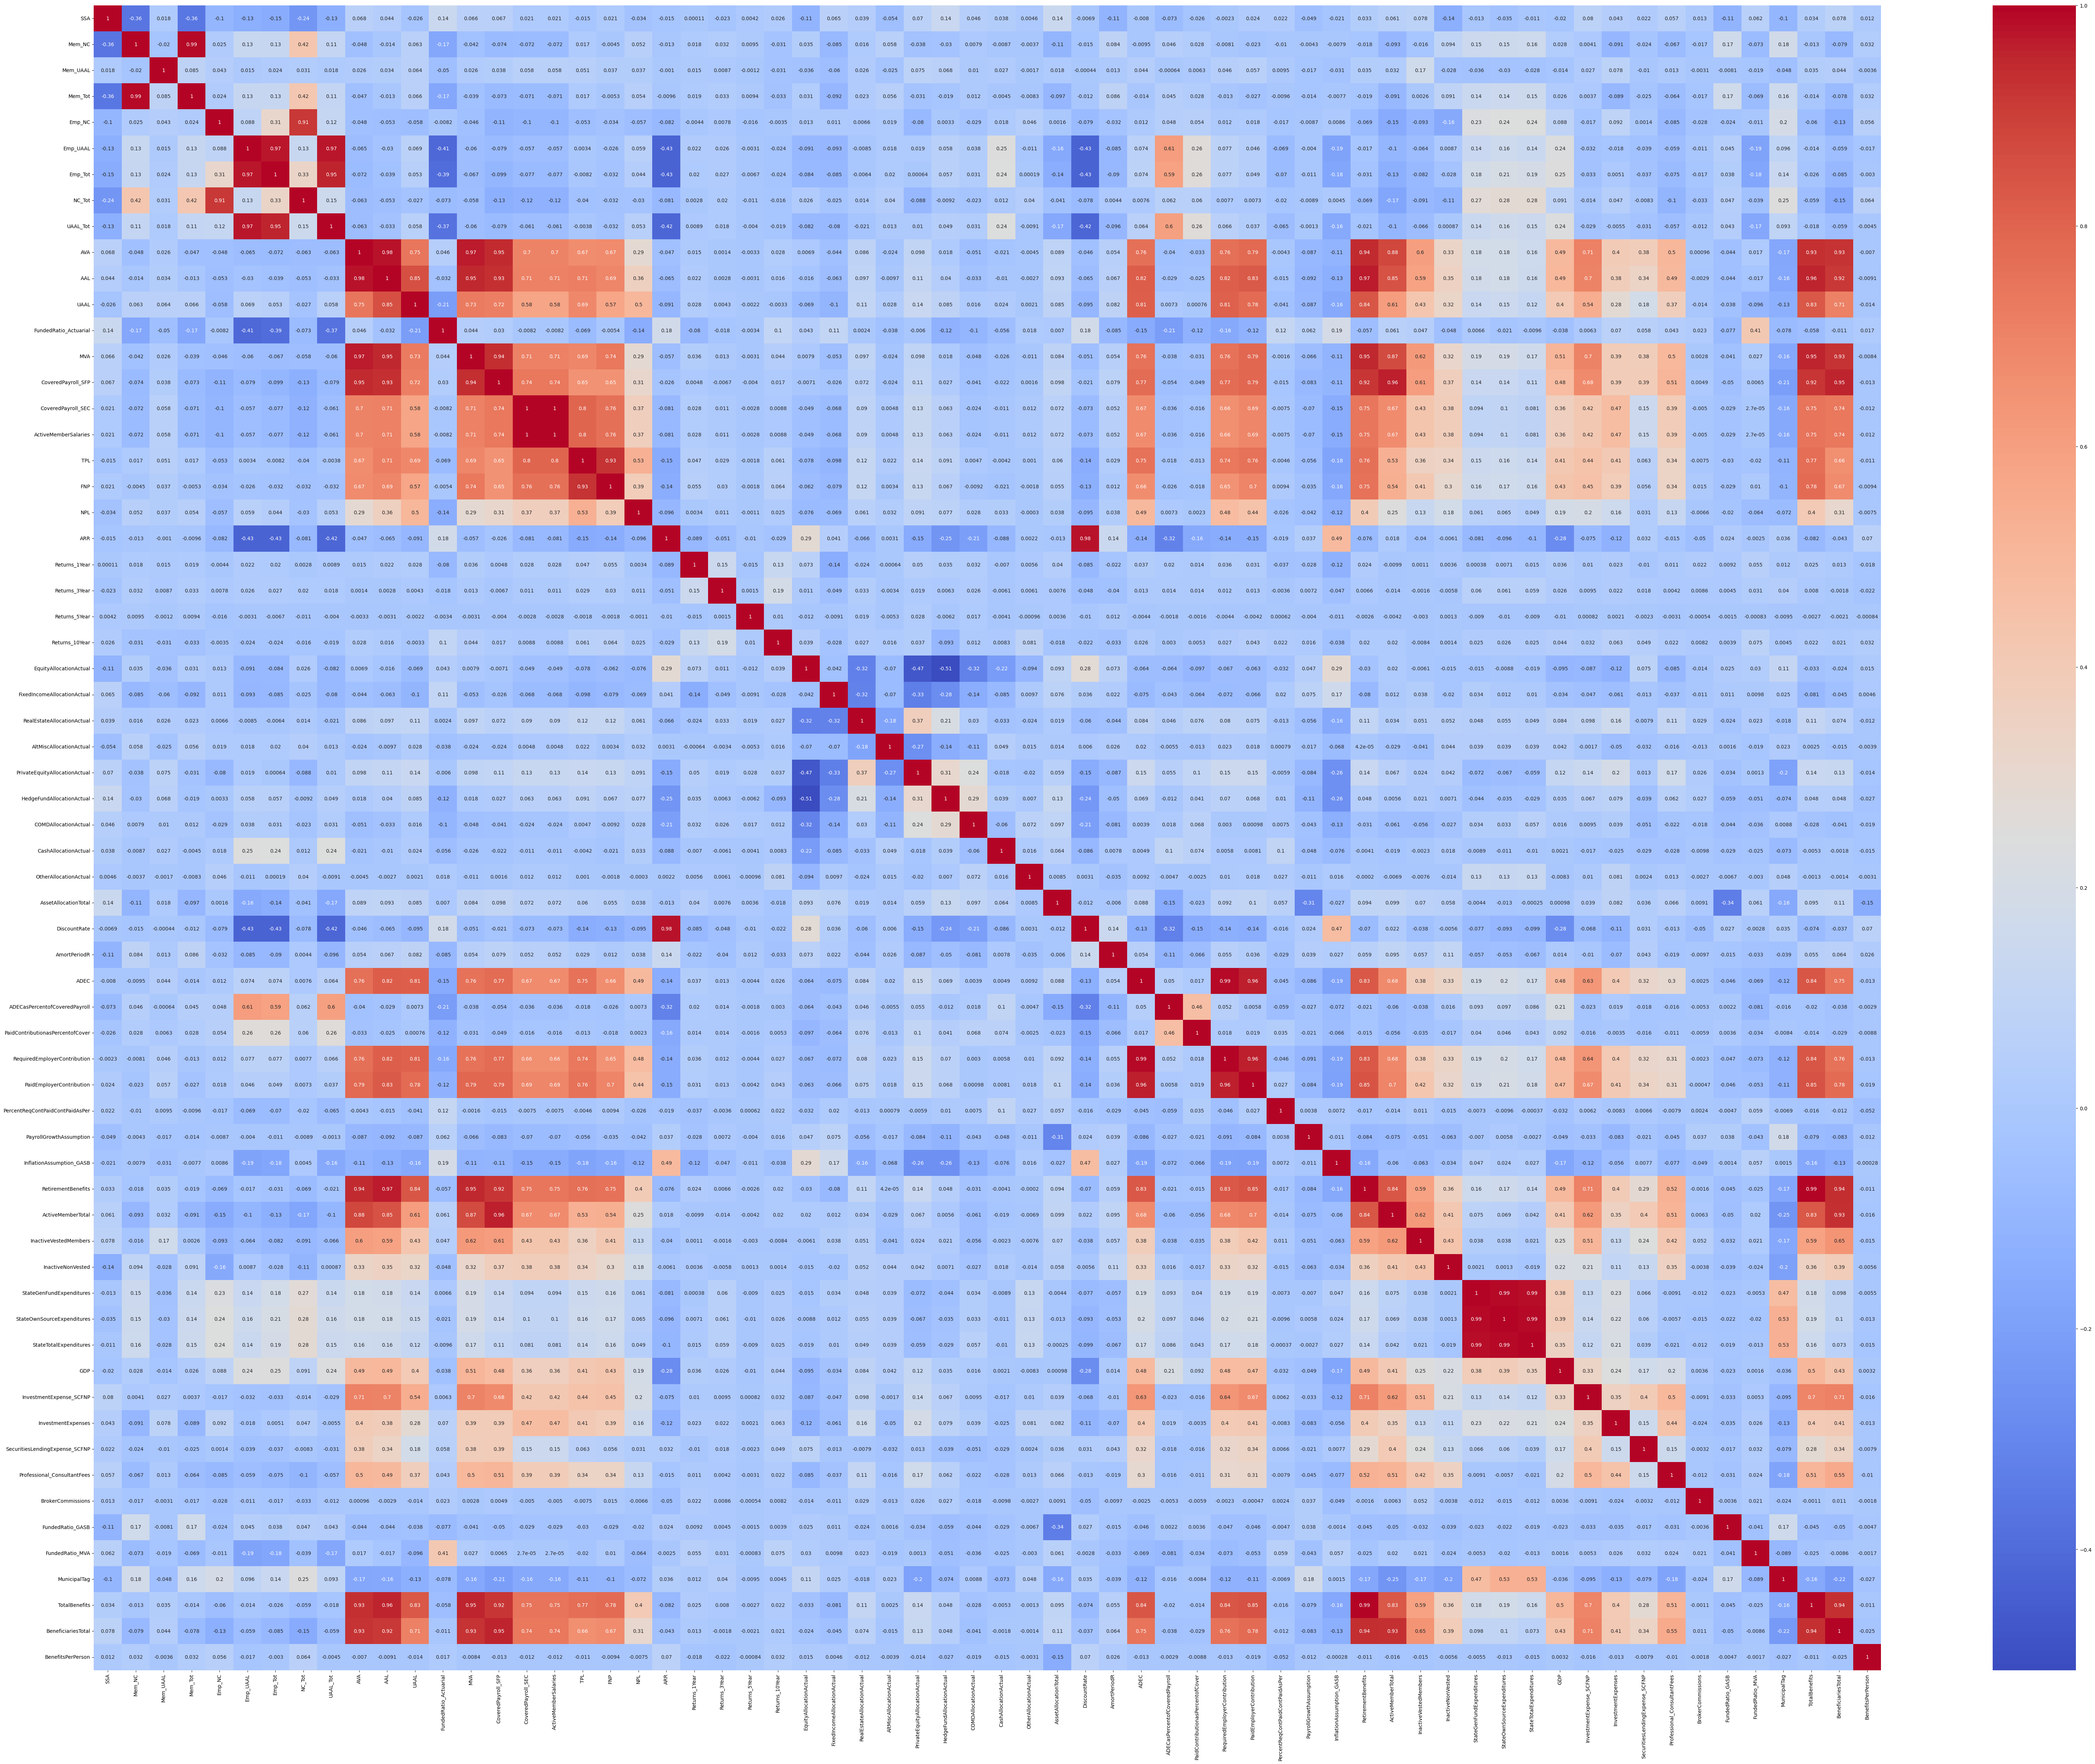

In [394]:
cor=df1.corr()
plt.figure(figsize=(80,60))
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [395]:
df.isnull().sum()

Plan_Shorthand                        0
Investment_Fund                       0
SSA                                   0
Job_Covers                            0
StateName                             0
GovtName                              0
ActRptDate                            0
DateFYE                               0
Month                                 0
Year                                  0
ValReport                             0
ACFR                                  0
Mem_NC                                0
Mem_UAAL                              0
Mem_Tot                               0
Emp_NC                                0
Emp_UAAL                              0
Emp_Tot                               0
NC_Tot                                0
UAAL_Tot                              0
AVA                                   0
AAL                                   0
UAAL                                  0
FundedRatio_Actuarial                 0
MVA                                   0


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Plan_Shorthand                    5684 non-null   object 
 1   Investment_Fund                   5684 non-null   object 
 2   SSA                               5684 non-null   int64  
 3   Job_Covers                        5684 non-null   object 
 4   StateName                         5684 non-null   object 
 5   GovtName                          5684 non-null   object 
 6   ActRptDate                        5684 non-null   object 
 7   DateFYE                           5684 non-null   object 
 8   Month                             5684 non-null   float64
 9   Year                              5684 non-null   int64  
 10  ValReport                         5684 non-null   float64
 11  ACFR                              5684 non-null   float64
 12  Mem_NC

END OF CLEANING 


In [397]:
# object_features=df1.select_dtypes(include='object').columns.tolist()
# print(object_features,len(object_features))

In [398]:
# df2=pd.get_dummies(df1,columns=object_features, prefix=object_features,drop_first=False, )

In [399]:
# import matplotlib.pyplot as plt

# # Assuming you have a correlation_matrix computed as described earlier
# correlation_matrix = df2.corr()

# plt.figure(figsize=(10, 8), dpi=300)  # Adjust the figure size as needed
# plt.matshow(correlation_matrix, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.colorbar()  # Add a colorbar for reference
# plt.show()

In [400]:
# m=df2.columns

In [401]:
# df2.info()

In [402]:
# x = df2.drop('Mem_NC',axis =1)
# y = df2['Mem_NC']

In [403]:
# from sklearn.model_selection import train_test_split

In [404]:
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=56)

In [405]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()

In [406]:
# linear_reg.fit(train_x, train_y)
# train_predict = linear_reg.predict(train_x)
# test_predict = linear_reg.predict(test_x)
# mse_test = mean_squared_error(test_y, test_predict)
# mae_test = mean_absolute_error(test_y, test_predict)
# r2_test = r2_score(test_y, test_predict)

# print('Mean Squared Error (MSE):', mse_test)
# print('Mean Absolute Error (MAE):', mae_test)
# print('R-squared (R^2) Score:', r2_test)